## Assignment: predicting house prices and examining for overfitting and regularization

1. Reimplement your model from the previous checkpoint.
1. Try the below regressions using the same model specification. This time, you need to do **k-fold cross-validation** to choose the best hyperparameter values for your models. Scikit-learn has RidgeCV, LassoCV, and ElasticNetCV that you can utilize to do this. Which model is the best? Why?

 - [OLS](#linear)
 - [Lasso](#lasso) 
 - [Ridge](#ridge)
 - [ElasticNet](#elastic) 
 
1. [Visualization of differences between models](#visualization)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn import linear_model

import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999
pd.set_option('display.max_columns', 500)

pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [4]:
# numerical features I'm interested in
house_features = house_prices[[x.lower() for x in ['OverallQual',
                                                    'OverallCond', 
                                                    'GrLivArea',
                                                    'bedroomabvgr']]].copy()

In [5]:
# assign X and Y variables

# Y is the target variable
Y = house_prices.saleprice
# X is the feature set which includes
X = pd.concat([house_features, pd.get_dummies(house_prices.neighborhood)], axis=1)

In [51]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


<a id="linear"></a>
### Linear Regression

In [52]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8022280009214591
-----Test set statistics-----
R-squared of the model in the test set is: 0.7617531585337538
Mean absolute error of the prediction is: 25891.42476260657
Mean squared error of the prediction is: 1599518791.378295
Root mean squared error of the prediction is: 39993.98443989165
Mean absolute percentage error of the prediction is: 14.887898723650439


In [24]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [57]:
alphas

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0,
 100000.0,
 1000000.0,
 10000000.0,
 100000000.0,
 1000000000.0,
 10000000000.0,
 100000000000.0,
 1000000000000.0,
 10000000000000.0,
 100000000000000.0,
 1000000000000000.0,
 1e+16,
 1e+17,
 1e+18,
 1e+19,
 1e+20,
 1e+21,
 1e+22,
 1.0000000000000001e+23,
 1e+24,
 1e+25,
 1e+26,
 1e+27,
 1e+28,
 1e+29,
 1e+30,
 1e+31,
 1e+32,
 1e+33,
 1e+34,
 1e+35,
 1e+36,
 1e+37,
 1e+38,
 1e+39]

<a id="ridge"></a>
### Ridge Regression

In [55]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridge_cv = RidgeCV(alphas=alphas, cv=5) 
ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model on the training set is: 0.801970655474733
-----Test set statistics-----
R-squared of the model on the test set is: 0.7645535487874842
Mean absolute error of the prediction is: 25852.05969139437
Mean squared error of the prediction is: 1580717799.9088278
Root mean squared error of the prediction is: 39758.24191169458
Mean absolute percentage error of the prediction is: 14.953180089391815


<a id="lasso"></a>
### Lasso Regression

In [54]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.8021949999919032
-----Test set statistics-----
R-squared of the model in test set is: 0.7620124058593734
Mean absolute error of the prediction is: 25913.01085801411
Mean squared error of the prediction is: 1597778281.5507946
Root mean squared error of the prediction is: 39972.21887199652
Mean absolute percentage error of the prediction is: 14.921725327546731


<a id="elastic"></a>
### ElasticNet Regression

In [53]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.001
R-squared of the model in training set is: 0.8021305683292748
-----Test set statistics-----
R-squared of the model in test set is: 0.7634817016218559
Mean absolute error of the prediction is: 25861.8940125298
Mean squared error of the prediction is: 1587913864.5968506
Root mean squared error of the prediction is: 39848.636922695994
Mean absolute percentage error of the prediction is: 14.922623547577944


<a id="visualization"></a>
### Visualize Differences

In [92]:
model = [lrm,
        ridge_cv,
        lasso_cv,
        elasticnet_cv]

training = []
test = []

for x in model:
    training.append(x.score(X_train, y_train))
    test.append(x.score(X_test, y_test))

In [93]:
df = pd.DataFrame(
    {'model': model,
     'training': training,
     'test': test
    })

In [94]:
df

,model,training,test
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.802,0.762
1,"RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, ...",0.802,0.765
2,"LassoCV(alphas=[1e-10, 1e-09, 1e-08, 1e-07, 1e...",0.802,0.762
3,"ElasticNetCV(alphas=[1e-10, 1e-09, 1e-08, 1e-0...",0.802,0.763


In [98]:
# only grap the model name
df['model'] = df.model.apply(lambda x: str(x).split('(')[0])

In [99]:
df

,model,training,test
0,LinearRegression,0.802,0.762
1,RidgeCV,0.802,0.765
2,LassoCV,0.802,0.762
3,ElasticNetCV,0.802,0.763


In [100]:
df = pd.melt(df, id_vars=['model'])

In [101]:
df

,model,variable,value
0,LinearRegression,training,0.802
1,RidgeCV,training,0.802
2,LassoCV,training,0.802
3,ElasticNetCV,training,0.802
4,LinearRegression,test,0.762
5,RidgeCV,test,0.765
6,LassoCV,test,0.762
7,ElasticNetCV,test,0.763


(0.74, 0.82)

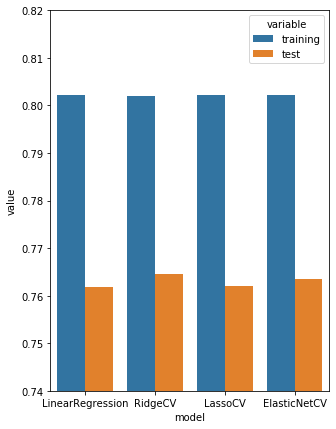

In [107]:
plt.subplots(figsize=(5,7))

sns.barplot(x=df.loc[:,'model'], \
             y=df.loc[:,'value'], \
             hue=df.loc[:,'variable'], \
             data=df)
plt.ylim(.74, .82)

Ridge regression appears to have a slight advantage for testing.